# Understanding Descriptive Statistics

Import the necessary libraries here:

In [45]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [46]:
def random_dice(rolls):
    dice_rolls = random.choices(range(1, 7), k=rolls)
    dice_df = pd.DataFrame({"turn": range(1, rolls + 1), "result": dice_rolls})
    return dice_df

dice_df = random_dice(10)

dice_df

,turn,result
0,1,2
1,2,2
2,3,4
3,4,1
4,5,2
5,6,3
6,7,5
7,8,3
8,9,6
9,10,2


#### 2.- Plot the results sorted by value.

In [47]:
dice_df = dice_df.sort_values(by = "result")

dice_df

,turn,result
3,4,1
0,1,2
1,2,2
4,5,2
9,10,2
5,6,3
7,8,3
2,3,4
6,7,5
8,9,6


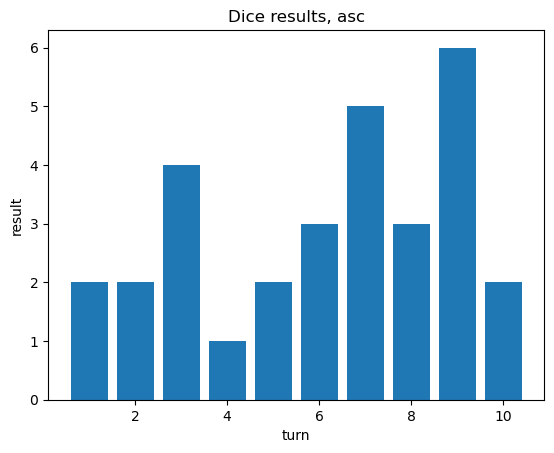

In [48]:
plt.bar(dice_df["turn"], dice_df["result"])
plt.xlabel("turn")
plt.ylabel("result")
plt.title("Dice results, asc")
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [49]:
freq_distribution = dice_df["result"].value_counts().sort_index()

freq_distribution

result
1    1
2    4
3    2
4    1
5    1
6    1
Name: count, dtype: int64

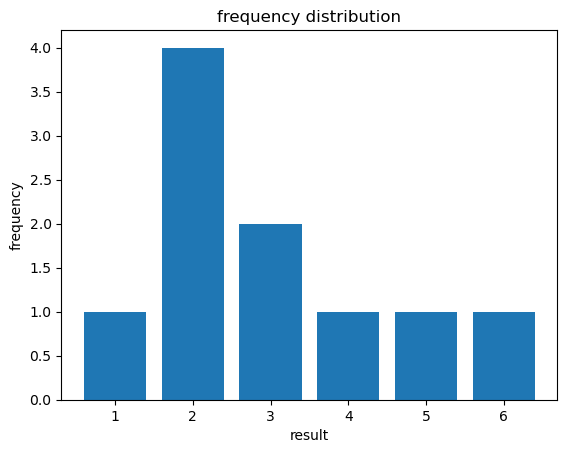

In [50]:
plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("result")
plt.ylabel("frequency")
plt.title("frequency distribution")
plt.show()

The first one is just an explanation / visualisation of the dice rolls and its results. This second chart shows the frequency of each result. The second is an analysis on the first and could not have been generated without the first one.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [51]:
def calc_mean(result_info):
    total = sum(result_info)
    mean_result = total / len(result_info)
    return mean_result

calc_mean(dice_df["result"])

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [52]:
def mean_from_freq(freq_distribution):
    total = (freq_distribution.index * freq_distribution).sum()
    sum_freq = freq_distribution.sum()
    mean_freq = total / sum_freq
    return mean_freq

mean_from_freq(freq_distribution)

3.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [60]:
freq_dist_array = freq_distribution.values

freq_dist_array

array([1, 4, 2, 1, 1, 1])

In [65]:
def calc_median(x):
    sorted_freq = sorted(x)
    n = len(sorted_freq)
    if n%2 == 1:
        median = sorted_freq[n // 2]
    else:
        median1 = sorted_freq[(n-1) // 2]
        median2 = sorted_freq[n // 2]
        median = (median1 + median2) / 2
    return median

In [66]:
calc_median(freq_dist_array)

1.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [67]:
def calc_quart(freq_distribution):
    sorted_freq = sorted(freq_distribution)
    st = len(sorted_freq)

    if st%2 == 1:
        q2 = sorted_freq[st // 2]
        low = sorted_freq[:st // 2]
        upp = sorted_freq[st // 2 + 1:]
    else:
        mid1 = sorted_freq[(st - 1) // 2]
        mid2 = sorted_freq[st // 2]
        q2 = (mid1 + mid2) / 2
        low = sorted_freq[:st // 2]
        upp = sorted_freq[st // 2:]

    st1 = len(low)
    if st1%2 == 1:
        q1 = low[st1 // 2]
    else:
        mid1 = low[(st1 - 1) // 2]
        mid2 = low[st1 // 2]
        q1 = (mid1 + mid2) / 2
    
    st3 = len(upp)
    if st3%2 == 1:
        q3 = upp[st3 // 2]
    else:
        mid1 = upp[(st3 - 1) // 2]
        mid2 = upp[st3 // 2]
        q3 = (mid1 + mid2) / 2

    return q1, q2, q3

calc_quart(freq_distribution)

(1, 1.0, 2)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [68]:
dice_100s = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day3/Descriptive-Stats/data/roll_the_dice_hundred.csv")

dice_100s = dice_100s.drop("Unnamed: 0", axis = 1)

dice_100s

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


In [69]:
dice_100s = dice_100s.sort_values(by = "value")

dice_100s

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


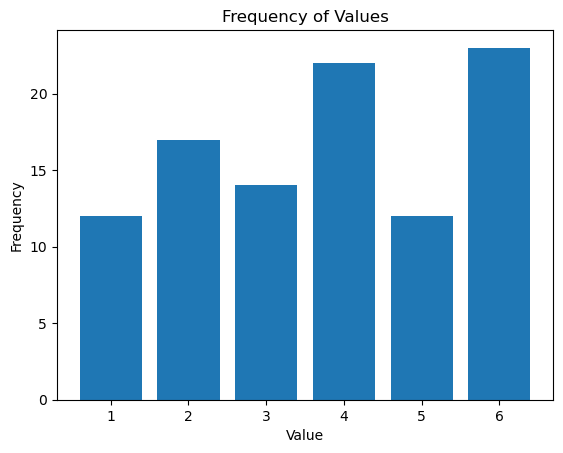

In [73]:
freq_distribution_100s = dice_100s["value"].value_counts().sort_index()

plt.bar(freq_distribution_100s.index, freq_distribution_100s.values)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Frequency of Values")
plt.xticks(freq_distribution_100s.index)
plt.show()

numbers 6 and 4 seem to be more recurrent than others.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [74]:
calc_mean(dice_100s["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [75]:
freq_distribution_100s

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

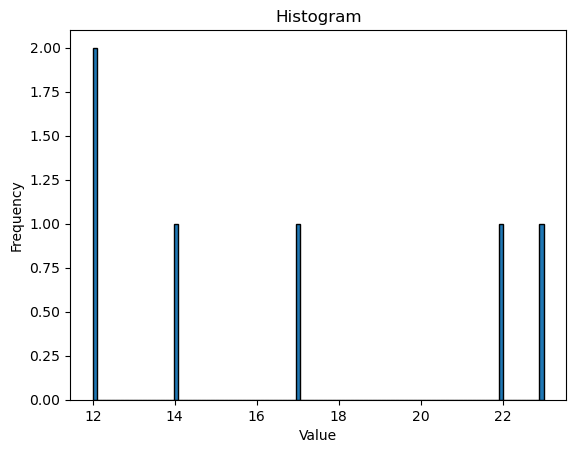

In [76]:
freq_distribution_100s.plot(kind = "hist", bins = 100, edgecolor = "black")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [77]:
freq_distribution_100s.mean()

16.666666666666668

In [ ]:
"""
your comments here




















"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [ ]:
dice_1000s = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day3/Descriptive-Stats/data/roll_the_dice_thousand.csv")

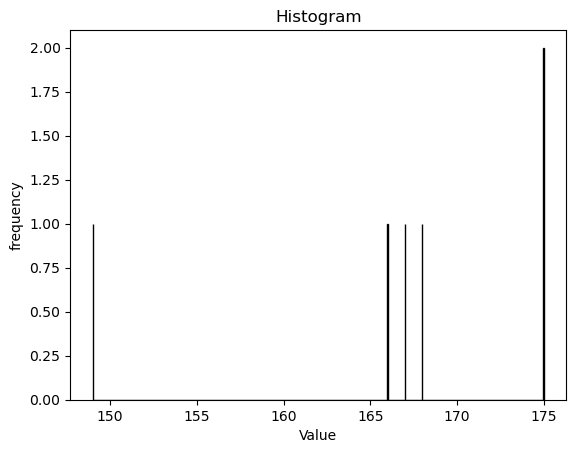

In [ ]:
freq_distribution_1000s = dice_1000s["value"].value_counts().sort_index()

freq_distribution_1000s.plot(kind = "hist", bins = 1000, edgecolor = "black")

plt.xlabel("Value")
plt.ylabel("frequency")
plt.title("Histogram")
plt.show()

In [ ]:
freq_distribution_1000s.mean()

166.66666666666666

In [ ]:
"""
your comments here
















"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
ages_pop = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day3/Descriptive-Stats/data/ages_population.csv")

ages_pop

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [ ]:
freq_dist_ages_pop = ages_pop["observation"].value_counts().sort_index()

freq_dist_ages_pop

observation
1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: count, Length: 72, dtype: int64

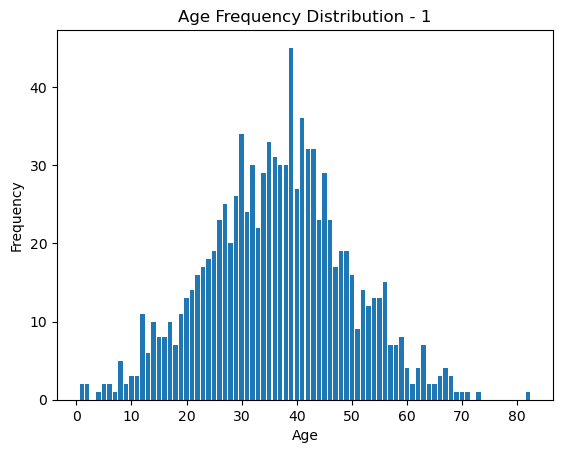

In [ ]:
plt.bar(freq_dist_ages_pop.index, freq_dist_ages_pop)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Frequency Distribution - 1")
plt.show()

mean should be around 40
and std is 4

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
mean_ages_pop = np.mean(ages_pop)
mean_ages_pop

36.56

In [ ]:
std_ages_pop = np.std(ages_pop)
std_ages_pop

observation    12.81009
dtype: float64

My guesses were:
    mean should be around 40
    and std is 4

So no they did not correspond.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
ages_pop2 = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day3/Descriptive-Stats/data/ages_population2.csv")

ages_pop2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [ ]:
freq_dist_ages_pop2 = ages_pop2["observation"].value_counts().sort_index()

freq_dist_ages_pop2

observation
19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: count, dtype: int64

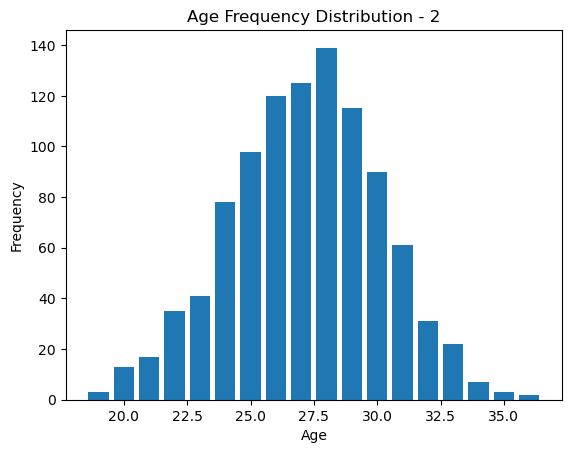

In [ ]:
plt.bar(freq_dist_ages_pop2.index, freq_dist_ages_pop2)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Frequency Distribution - 2")
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

People in AgePop2 are younger than AgePop and less outliers.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
mean_ages_pop2 = np.mean(ages_pop2)

mean_ages_pop2

27.155

In [ ]:
std_ages_pop2 = np.std(ages_pop2)

std_ages_pop2

observation    2.968329
dtype: float64

I think my observation was right - younger sample, less outliers.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [79]:
ages_pop3 = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day3/Descriptive-Stats/data/ages_population3.csv")

ages_pop3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [80]:
freq_dist_ages_pop3 = ages_pop3["observation"].value_counts().sort_index()

freq_dist_ages_pop3

observation
1.0     1
2.0     2
4.0     2
5.0     1
7.0     1
       ..
73.0    6
74.0    6
75.0    2
76.0    1
77.0    2
Name: count, Length: 75, dtype: int64

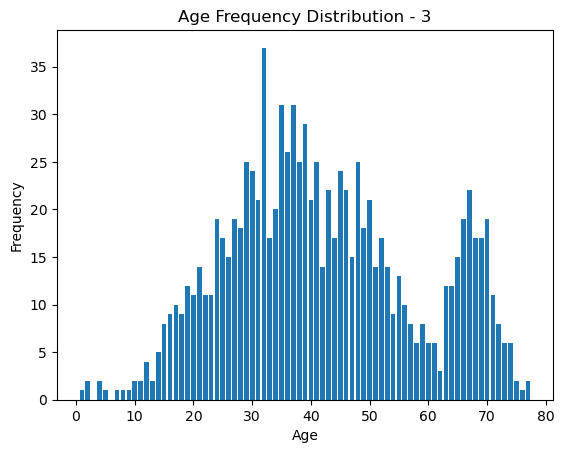

In [81]:
plt.bar(freq_dist_ages_pop3.index, freq_dist_ages_pop3)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Frequency Distribution - 3")
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [82]:
mean_ages_pop3 = np.mean(ages_pop3)

mean_ages_pop3

41.989

In [83]:
std_ages_pop3 = np.std(ages_pop3)

std_ages_pop3

observation    16.136632
dtype: float64

From the chart it seems the mean would be around 32, but the relatively high amount of people in their 60s (compared to people under 20) brings the mean to a higher value.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [84]:
q1 = ages_pop3["observation"].quantile(0.25)
q2 = ages_pop3["observation"].quantile(0.5)
q3 = ages_pop3["observation"].quantile(0.75)

print(q1, q2, q3)

30.0 40.0 53.0


The quartile calculation clearly shows the difference between q1 and q2 is smaller than q2 and q3.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [89]:
percentiles = [10, 20, 80, 90]
percentile_values = np.percentile(ages_pop3["observation"], percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value}")

10th percentile: 22.0
20th percentile: 28.0
80th percentile: 57.0
90th percentile: 67.0


You can see that most of the respondants are in the 80 and 90 percentile.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

'\nyour comments here\n'